In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

In [2]:
randomDataSet = dataSet = pd.read_csv("./../input_data/AdmissionDataset/data.csv")
# randomDataSet = dataSet.sample(frac=1).reset_index(drop=True)
Class = "Chance of Admit"
columns = ['Serial No.' , 'GRE Score' , 'TOEFL Score' , 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' , Class]
randomDataSet.columns = columns
columns = columns[1:]
randomDataSet = randomDataSet[columns]


In [3]:
# randomDataSet

In [4]:
for attr in columns[:-1]:
    randomDataSet[attr] = (randomDataSet[attr] - randomDataSet[attr].min())/(randomDataSet[attr].max() - randomDataSet[attr].min())
# randomDataSet.head()


/Users/martian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
trainingSet, validationSet = np.split(randomDataSet, [int(0.8*len(randomDataSet))])


In [6]:
# validationSet

In [7]:
alpha = 0.01
iterate = 1000

In [8]:
def hypothesis_hx(theta, row):
    hx = 0
    n = len(theta)
    for i in range(0, n - 1):
        hx += theta[i]*row[i]
    return hx + theta[n - 1]

In [9]:
def error(df, theta):
    error_list = []
    for index, row in df.iterrows():
        y = row[Class]
        hx = hypothesis_hx(theta, row)
        error_list.append(hx - y)
    return error_list

In [10]:
def costFunction(df, theta):
    Jtheta = 0
    er = 0
    error_list = error(df, theta)
    m = len(error_list)
    for i in range(0, m):
        er += error_list[i]**2
    Jtheta = er/(2*m + eps)
    return Jtheta , error_list

In [11]:
def sumError(df, error_list, j):
    m = len(error_list)
    n = len(theta)
    sum_error = 0
    for i in range(0, m):
        if j == n - 1:
            sum_error += error_list[i]
        else:
            sum_error += error_list[i]*df.iloc[i][j]
    return sum_error/(m + eps)

In [12]:
def gradientDecent(df, theta, error_list):
    n = len(theta)
    for j in range(0, n):
        theta[j] = theta[j] - alpha*sumError(df, error_list, j)
    return theta

In [13]:
def plotter(label_x, label_y, title, x_axis, y_axis, mark='', colr = 'blue'):
    plt.figure(num=None, figsize=(6, 4), dpi=175, facecolor='w', edgecolor='k')
    # plotting the points  
    plt.plot(x_axis, y_axis, marker = mark, color = colr, label = 'Error rate') 
    # naming the x axis 
    plt.xlabel(label_x) 
    # naming the y axis 
    plt.ylabel(label_y) 

    # giving a title to my graph 
    plt.title(title) 
    plt.grid(True)
    # function to show the plot 
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0.]
0 0.2705136111111113
1 0.2528544140186455
2 0.23637034234032267
3 0.2209831578156717
4 0.20661983131476963
5 0.1932121960120469
6 0.1806966236519338
7 0.16901372236888576
8 0.15810805462668104
9 0.14792787393745066
10 0.13842487911006668
11 0.12955398486078532
12 0.12127310769673344
13 0.11354296605536736
14 0.10632689375073638
15 0.09959066584057441
16 0.09330233608724006
17 0.08743208524057834
18 0.0819520794221762
19 0.07683633793845815
20 0.07206060989484311
21 0.06760225902498697
22 0.06344015618814339
23 0.05955457902409983
24 0.055927118289130204
25 0.052540590428143456
26 0.049378955967815025
27 0.04642724334314184
28 0.04367147779565715
29 0.04109861500563468
30 0.03869647914308985
31 0.036453705043372434
32 0.03435968423273377
33 0.03240451454753643
34 0.0305789531078375
35 0.02887437242201339
36 0.027282719413956432
37 0.02579647717826002
38 0.02440862928175957
39 0.02311262644189312
40 0.021902355423631198
41 0.020772110007262784
42 0.0197165638891

331 0.003409882255411744
332 0.0034064276721107174
333 0.0034029835396147006
334 0.003399549821997441
335 0.003396126483462651
336 0.003392713488343454
337 0.0033893108011019035
338 0.0033859183863284457
339 0.0033825362087414384
340 0.003379164233186643
341 0.00337580242463673
342 0.003372450748190772
343 0.003369109169073793
344 0.0033657776526362236
345 0.0033624561643534993
346 0.0033591446698255016
347 0.0033558431347761397
348 0.0033525515250528424
349 0.0033492698066261077
350 0.0033459979455890427
351 0.003342735908156879
352 0.003339483660666521
353 0.0033362411695760917
354 0.003333008401464481
355 0.0033297853230308655
356 0.003326571901094294
357 0.0033233681025932227
358 0.00332017389458505
359 0.0033169892442457063
360 0.003313814118869189
361 0.0033106484858671267
362 0.0033074923127683546
363 0.0033043455672184647
364 0.0033012082169793623
365 0.0032980802299288695
366 0.0032949615740602506
367 0.0032918522174818356
368 0.003288752128416545
369 0.0032856612752014975
370

652 0.0026868167234842953
653 0.00268541262161526
654 0.0026840121046691015
655 0.0026826151611858183
656 0.002681221779745451
657 0.002679831948967921
658 0.0026784456575128976
659 0.0026770628940796506
660 0.0026756836474069066
661 0.0026743079062727057
662 0.0026729356594942613
663 0.0026715668959278165
664 0.002670201604468498
665 0.0026688397740501912
666 0.002667481393645377
667 0.002666126452265017
668 0.002664774938958392
669 0.0026634268428129748
670 0.0026620821529542956
671 0.0026607408585457948
672 0.0026594029487886904
673 0.002658068412921839
674 0.002656737240221608
675 0.002655409420001727
676 0.0026540849416131613
677 0.00265276379444398
678 0.0026514459679192054
679 0.0026501314515007066
680 0.00264882023468704
681 0.002647512307013327
682 0.0026462076580511234
683 0.002644906277408293
684 0.002643608154728863
685 0.0026423132796928954
686 0.0026410216420163775
687 0.002639733231451057
688 0.0026384480377843506
689 0.002637166050839172
690 0.0026358872604738525
691 0.

973 0.002371687134963056
974 0.002371013130539781
975 0.0023703404829746896
976 0.00236966918843503
977 0.002368999243100693
978 0.002368330643164189
979 0.0023676633848305874
980 0.002366997464317476
981 0.0023663328778549186
982 0.0023656696216854092
983 0.0023650076920638257
984 0.002364347085257397
985 0.0023636877975456456
986 0.0023630298252203495
987 0.0023623731645855003
988 0.002361717811957266
989 0.0023610637636639347
990 0.0023604110160458736
991 0.0023597595654555052
992 0.0023591094082572378
993 0.0023584605408274446
994 0.0023578129595544085
995 0.002357166660838288
996 0.00235652164109107
997 0.0023558778967365294
998 0.0023552354242101867
999 0.002354594219959279


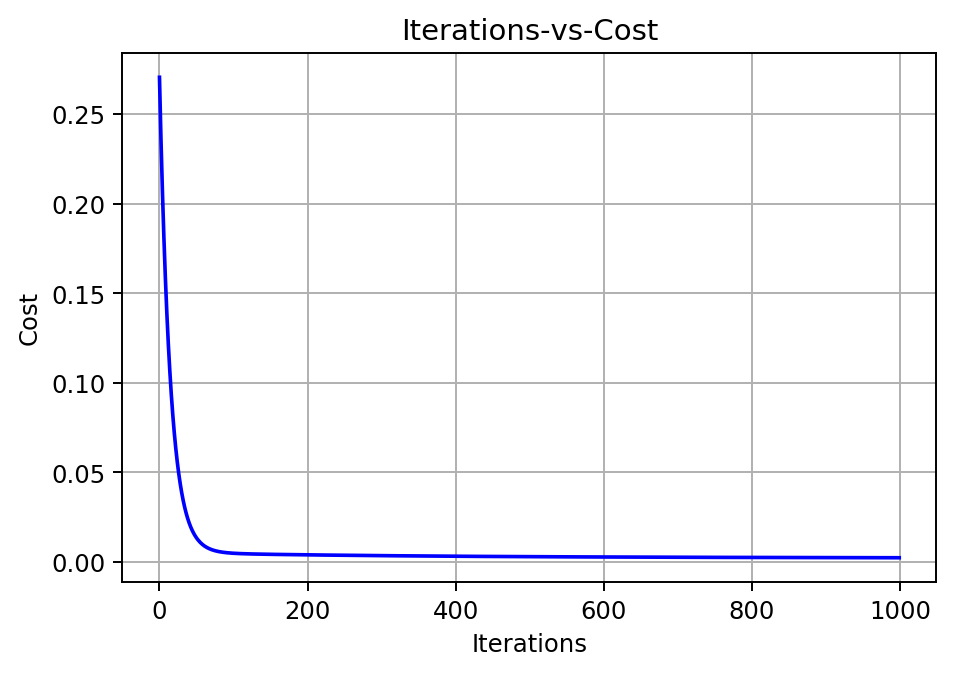

In [14]:
# Fitting the Model
theta = np.zeros([trainingSet.shape[1]])
print(theta)
iteration_list = []
cost_list = []
before = 10
for i in range(iterate):
    cost , error_list = costFunction(trainingSet, theta)
    theta = gradientDecent(trainingSet, theta, error_list)
    iteration_list.append(i)
    cost_list.append(cost)
    print(i,cost)
#     print(theta)
#     if before - cost < 0.0001:
#         break
#     before = cost
plotter('Iterations','Cost','Iterations-vs-Cost',iteration_list,cost_list)

In [15]:
def predict(theta, featureRow):
    n = len(theta)
    y = 0
    for i in range(0, n - 1):
        y += theta[i]*featureRow[i]
    return y + theta[n - 1]


In [16]:
def valdidation(validationSet,theta):
    true_positive = 0
    true_negative = 0 
    false_negative = 0
    false_positive = 0
    predicted = []
    actual = []
    for index, row in validationSet.iterrows():
        if hypothesis_hx(theta, row) > 0.5:
            pred = 1 
        else:
            pred = 0
        if row[Class] > 0.5:
            ac = 1
        else:
            ac = 0
        if pred == ac:
            if pred == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if pred == 1:
                false_positive += 1
            else:
                false_negative += 1
        predicted.append(pred)
        actual.append(ac)
        print(pred)
        print(ac)
        print("-----------")
    return true_positive, true_negative , false_negative, false_positive, predicted, actual


In [17]:
true_positive, true_negative , false_negative, false_positive, predicted,actual = valdidation(validationSet,theta)


1
0
-----------
0
0
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
0
0
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
0
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
0
-----------
0
1
-----------
1
1
-----------
1
1
-----------
0
0
-----------
0
0
-----------
1
1
-----------
1
1
-----------
1
1
-----------
1
1
----

In [18]:
#Mean square error
def MSE(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

In [19]:
#Mean absolute error
def MAE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))))

In [20]:
# Mean absolute percentage error function
def MAPE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))/(np.array(actual) + eps))) * 100

In [21]:
def accuracy(true_positive , true_negative , false_negative, false_positive):
    return ((true_positive + true_negative)*100)/(true_positive + true_negative + false_positive + false_negative + eps)

In [22]:
def recall(true_positive , false_negative):
    return true_positive*100/(true_positive +  false_negative+ eps)

In [23]:
def precision(true_positive , false_positive):
    return true_positive*100/(true_positive +  false_positive + eps)

In [24]:
def f1score(recall , prescision):
    return 2/(1/(float(recall)+eps)+1/(float(prescision)+eps))

In [25]:
MSE(predicted , actual)


0.05555555555555555

In [26]:
MAE(predicted , actual)


0.05555555555555555

In [27]:
MAPE(predicted , actual)


1.5011998757901654e+16

In [28]:
acc = accuracy(true_positive , true_negative , false_negative, false_positive)
rec = recall(true_positive , false_negative)
pre = precision(true_positive , false_positive)
f1 = f1score(rec, pre)

print("------------Entropy------------")
print("ACCURACY%: ", acc)
print("RECALL: ", rec)
print("PRECISION: ", pre)
print("F1-score: ", f1)


------------Entropy------------
ACCURACY%:  94.44444444444444
RECALL:  97.53086419753086
PRECISION:  96.34146341463415
F1-score:  96.93251533742331


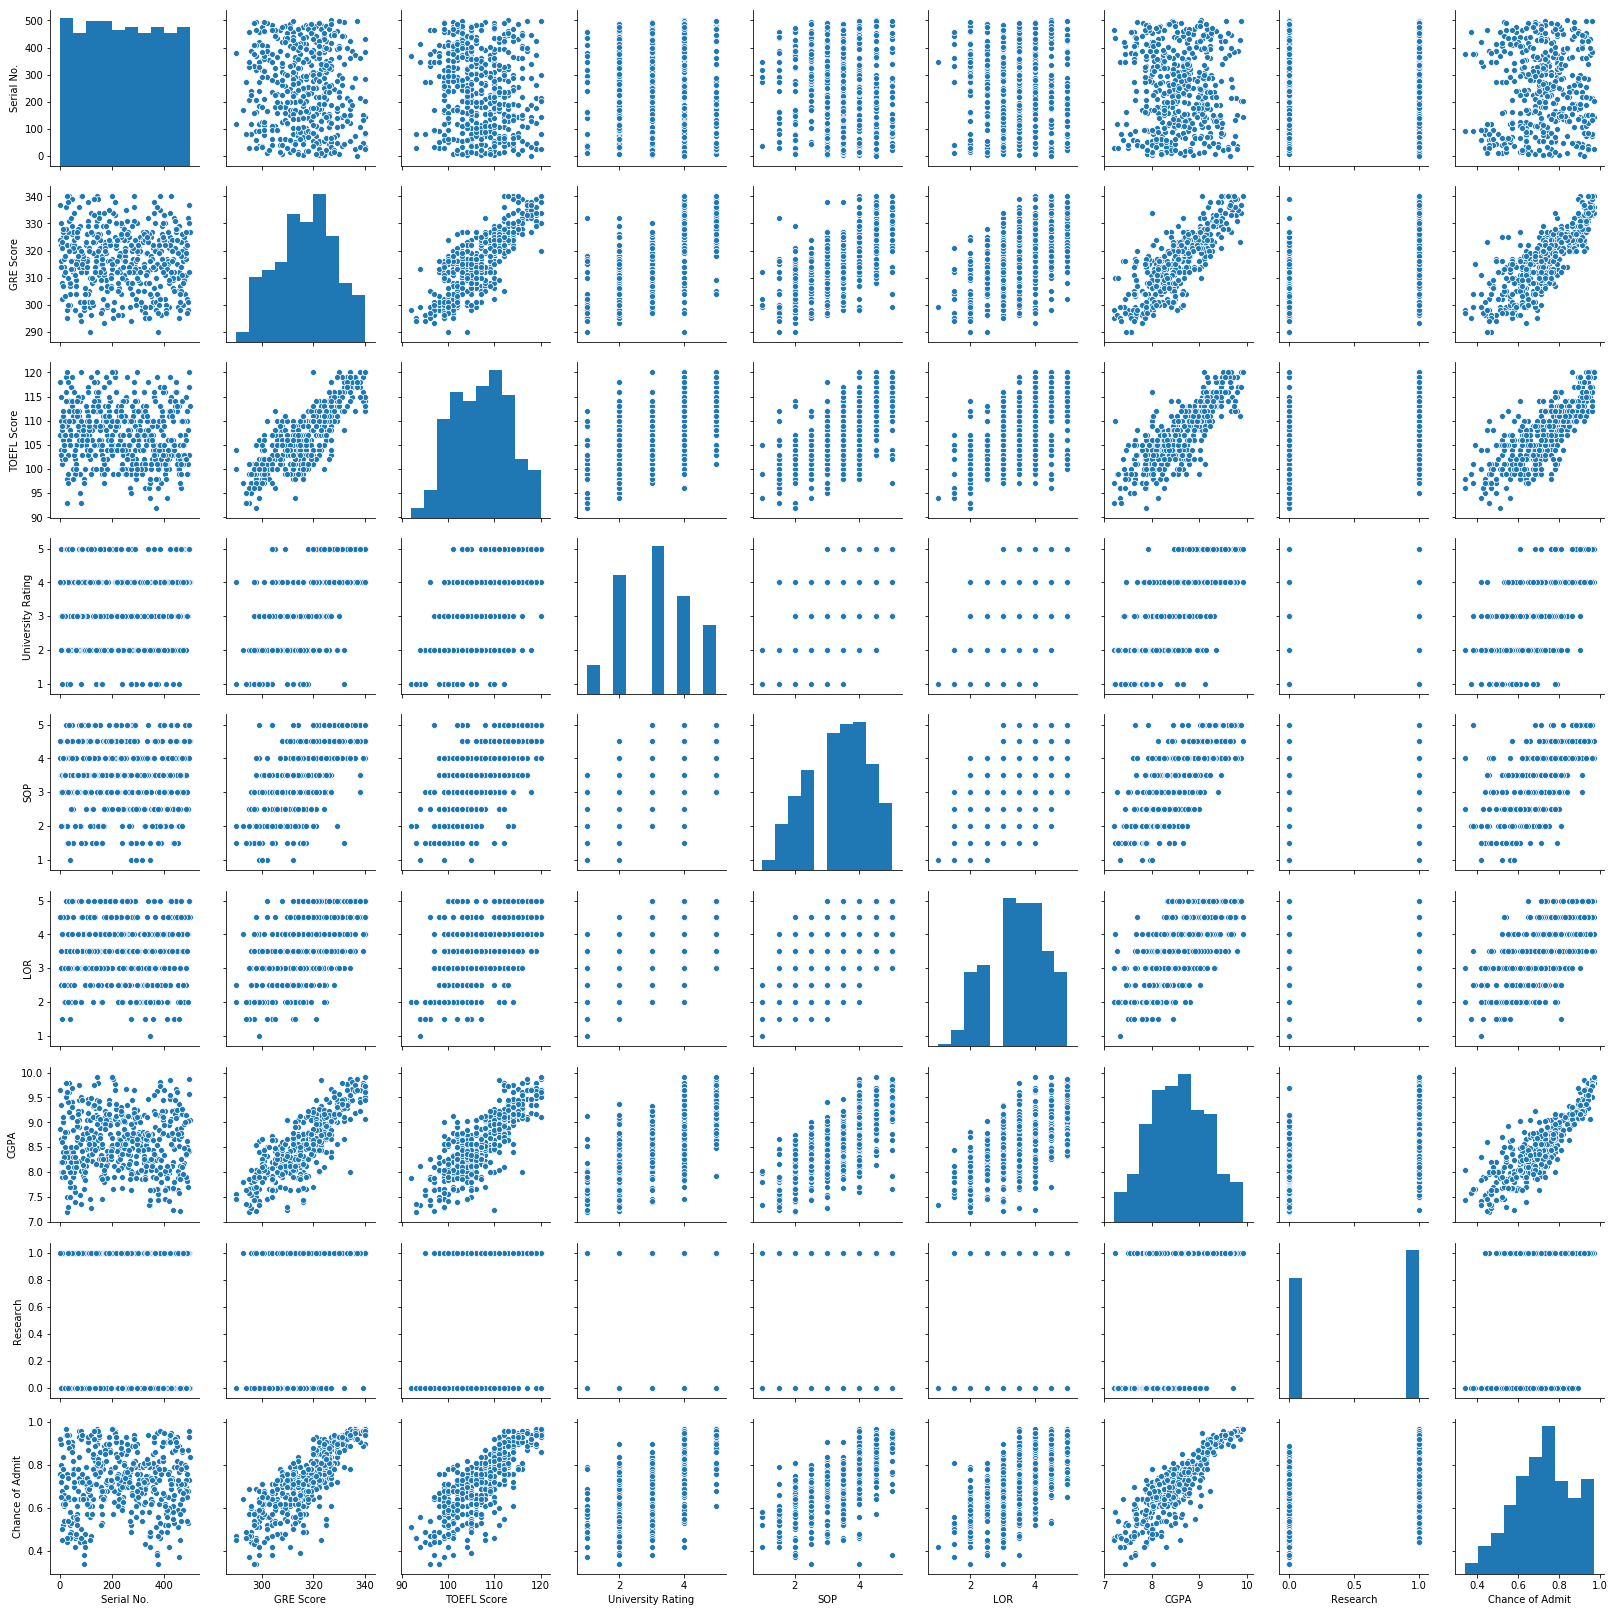

In [29]:
sns.pairplot(dataSet)


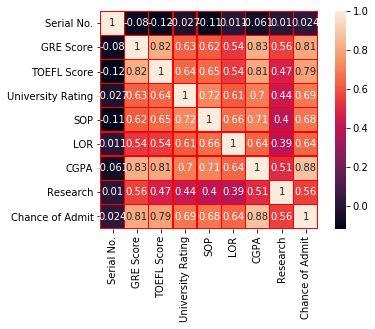

In [30]:
sns.heatmap(dataSet.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)
